# YOLO HW - Aortic Valve Object Detection (Testing)
## Prof. Chia-Yu Lin

This notebook runs predictions using the trained YOLOv12 model on test images.

## 1. Environment Setup

In [1]:
# Check GPU availability
!nvidia-smi

Tue Dec 16 07:33:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Ensure no encoding errors occur
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [3]:
# Install and import ultralytics
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.239 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.5/112.6 GB disk)


## 2. Download the Testing Dataset

In [4]:
import gdown
import os

!mkdir ./datasets

# Download testing_image.zip
gdown.download("https://drive.google.com/uc?export=download&id=1OFhKSQD-QRe8ZX0CEglKY5cdLA4K_BZ2", "/content/datasets/testing.zip")
!unzip '/content/datasets/testing' -d '/content/datasets/temp'

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1OFhKSQD-QRe8ZX0CEglKY5cdLA4K_BZ2
From (redirected): https://drive.google.com/uc?export=download&id=1OFhKSQD-QRe8ZX0CEglKY5cdLA4K_BZ2&confirm=t&uuid=350ede2a-84c7-4c2a-8fa5-0dab1b0efda3
To: /content/datasets/testing.zip
100%|██████████| 359M/359M [00:12<00:00, 29.6MB/s]


Archive:  /content/datasets/testing.zip
   creating: /content/datasets/temp/test_patient0009/
  inflating: /content/datasets/temp/test_patient0009/test_patient0009_0001.png  
  inflating: /content/datasets/temp/test_patient0009/test_patient0009_0002.png  
  inflating: /content/datasets/temp/test_patient0009/test_patient0009_0003.png  
  inflating: /content/datasets/temp/test_patient0009/test_patient0009_0004.png  
  inflating: /content/datasets/temp/test_patient0009/test_patient0009_0005.png  
  inflating: /content/datasets/temp/test_patient0009/test_patient0009_0006.png  
  inflating: /content/datasets/temp/test_patient0009/test_patient0009_0007.png  
  inflating: /content/datasets/temp/test_patient0009/test_patient0009_0008.png  
  inflating: /content/datasets/temp/test_patient0009/test_patient0009_0009.png  
  inflating: /content/datasets/temp/test_patient0009/test_patient0009_0010.png  
  inflating: /content/datasets/temp/test_patient0009/test_patient0009_0011.png  
  inflating: /c

## 3. Move Files to a Single Folder
Collect all PNG files from separate patient folders into one folder.

In [5]:
import os
import shutil
import glob

source_root = "/content/datasets/temp"
target_folder = "/content/datasets/testing_image"

os.makedirs(target_folder, exist_ok=True)

count = 0
deleted_folders = 0

# Move files (for test_patient0001 to test_patient0010)
for i in range(1, 11):
    patient_folder_name = f"test_patient{i:04d}"
    patient_folder_path = os.path.join(source_root, patient_folder_name)

    if os.path.exists(patient_folder_path):
        png_files = glob.glob(os.path.join(patient_folder_path, "*.png"))

        if len(png_files) > 0:
            print(f"Processing {patient_folder_name}... (found {len(png_files)} images)")

            for file_path in png_files:
                file_name = os.path.basename(file_path)
                new_path = os.path.join(target_folder, file_name)

                shutil.move(file_path, new_path)
                count += 1

            # After moving, remove the patient folder
            shutil.rmtree(patient_folder_path)
            deleted_folders += 1

print(f"\nTotal images moved: {count}")
print(f"Folders deleted: {deleted_folders}")

Processing test_patient0001... (found 391 images)
Processing test_patient0002... (found 277 images)
Processing test_patient0003... (found 389 images)
Processing test_patient0004... (found 287 images)
Processing test_patient0005... (found 298 images)
Processing test_patient0006... (found 319 images)
Processing test_patient0007... (found 427 images)
Processing test_patient0008... (found 289 images)
Processing test_patient0009... (found 322 images)
Processing test_patient0010... (found 368 images)

Total images moved: 3367
Folders deleted: 10


In [6]:
# Verify the number of test images
print(f"Total test images: {len(os.listdir(target_folder))}")

Total test images: 3367


## 4. Upload Model Weights and Run Prediction

**Upload the trained best.pt file to Colab by drag and drop into the Files panel.**

In [7]:
# Upload the trained best.pt to Colab by drag and drop.
# Run prediction using the trained model (runtime ~2 minutes).

from ultralytics import YOLO

# Model parameter reference: https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/default.yaml
model = YOLO('/content/best.pt')

results = model.predict(
    source="./datasets/testing_image/",
    save=True,
    imgsz=640,
    device=0,
    conf=0.25,  # Confidence threshold
)


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/3367 /content/datasets/testing_image/test_patient0001_0001.png: 640x640 (no detections), 14.2ms
image 2/3367 /content/datasets/testing_image/test_patient0001_0002.png: 640x640 (no detections), 13.3ms
image 3/3367 /content/datasets/testing_image/test_patient0001_0003.png: 640x640 1 aortic_valve, 12.7ms
image 4/3367 /content/datasets/testing_image/test_patient0001_0004.png: 640x640 1 aortic_valve, 13.9ms
image 5/3367 /content/datasets/testing_image

## 5. View Prediction Results

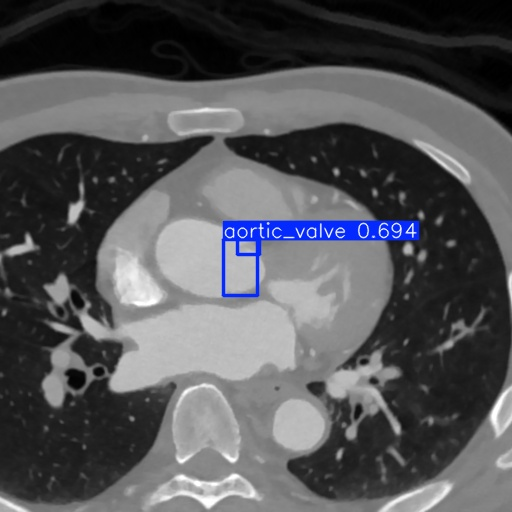

In [8]:
from IPython.display import Image

# Display one example prediction result
# You can change the filename to view different results
Image(filename='/content/runs/detect/predict/test_patient0001_0260.jpg', height=600)

## 6. Check Prediction Details

In [9]:
# Check the number of predictions
print(f"Total predictions: {len(results)}")

Total predictions: 3367


In [10]:
# View prediction details for a specific image
# Find an image with detections
for i, r in enumerate(results):
    if len(r.boxes.cls.tolist()) > 0:
        print(f'Image index: {i}')
        print('Predicted class : ', r.boxes.cls[0].item())
        print('Confidence score : ', r.boxes.conf[0].item())
        print('Bounding box coordinates : ', r.boxes.xyxy[0].tolist())
        break

Image index: 2
Predicted class :  0.0
Confidence score :  0.3590227961540222
Bounding box coordinates :  [111.15472412109375, 283.9306335449219, 146.4556121826172, 306.5829772949219]


## 7. Write Bounding Box Values to a CSV File

In [11]:
import csv

output_file = open('./predict_label.csv', 'w', newline='')
writer = csv.writer(output_file)

# header
writer.writerow(["id", "image_name", "class", "confidence", "top-left x-coordinate", "top-left y-coordinate", "bottom-right x-coordinate", "bottom-right y-coordinate"])

id_counter = 0

for i in range(len(results)):
    # Get image filename (without extension)
    filename = results[i].path.split('/')[-1].split('.png')[0]

    # Get the number of predicted boxes
    boxes = results[i].boxes
    box_num = len(boxes.cls.tolist())

    # If there are predicted boxes
    if box_num > 0:
        for j in range(box_num):
            # Extract information
            label = int(boxes.cls[j].item())              # class
            conf = float(boxes.conf[j].item())            # confidence score
            x1, y1, x2, y2 = boxes.xyxy[j].tolist()       # bounding box coordinates

            # write row
            writer.writerow([id_counter, filename, label, f"{conf:.4f}", int(x1), int(y1), int(x2), int(y2)])

            # Increment after writing each row
            id_counter += 1

# Close the output file
output_file.close()

print(f"Total predictions written: {id_counter}")
print("predict_label.csv has been created successfully!")

Total predictions written: 1164
predict_label.csv has been created successfully!


## 8. Preview the CSV File

In [12]:
import pandas as pd

# Read and display the first few rows
df = pd.read_csv('./predict_label.csv')
print(f"Total rows: {len(df)}")
df.head(20)

Total rows: 1164


,id,image_name,class,confidence,top-left x-coordinate,top-left y-coordinate,bottom-right x-coordinate,bottom-right y-coordinate
0,0,test_patient0001_0003,0,0.3590,111,283,146,306
1,1,test_patient0001_0004,0,0.3531,111,283,146,306
2,2,test_patient0001_0005,0,0.3131,461,374,490,401
3,3,test_patient0001_0006,0,0.4302,460,366,491,399
4,4,test_patient0001_0006,0,0.3129,115,285,146,305
5,5,test_patient0001_0007,0,0.4797,117,285,147,307
6,6,test_patient0001_0008,0,0.3101,119,286,147,307
7,7,test_patient0001_0009,0,0.5509,456,366,493,419
8,8,test_patient0001_0009,0,0.4588,121,287,149,309
9,9,test_patient0001_0010,0,0.6940,120,287,150,309


## 9. Download the Prediction Label File

In [13]:
from google.colab import files
files.download('/content/predict_label.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 10. Submit to Kaggle

1. Go to Kaggle: https://www.kaggle.com/t/5e544dc724464b7f970afdf6e8036803
2. Join the competition
3. Set your Team Name to your **student ID** (e.g., 114522000)
4. Upload `predict_label.csv`
5. Submit and check your score on the leaderboard